In [2]:
import numpy as np
import pandas as pd

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

%config InlineBackend.figure_format = 'svg'

from pylab import rcParams
rcParams['figure.figsize'] = 5, 4

In [1]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn import metrics

In [4]:
df = pd.read_csv('UCI_Credit_Card.csv')

## Filter some data according to the previous EDA section

In [5]:
iqr_LIMIT_BAL = df['LIMIT_BAL'].quantile(0.75) - df['LIMIT_BAL'].quantile(0.25)
iqr_BILL_AMT1 = df['BILL_AMT1'].quantile(0.75) - df['BILL_AMT1'].quantile(0.25)
iqr_BILL_AMT2 = df['BILL_AMT2'].quantile(0.75) - df['BILL_AMT2'].quantile(0.25)
iqr_BILL_AMT3 = df['BILL_AMT3'].quantile(0.75) - df['BILL_AMT3'].quantile(0.25)
iqr_BILL_AMT4 = df['BILL_AMT4'].quantile(0.75) - df['BILL_AMT4'].quantile(0.25)
iqr_BILL_AMT5 = df['BILL_AMT5'].quantile(0.75) - df['BILL_AMT5'].quantile(0.25)
iqr_BILL_AMT6 = df['BILL_AMT6'].quantile(0.75) - df['BILL_AMT6'].quantile(0.25)

iqr_PAY_AMT1 = df['PAY_AMT1'].quantile(0.75) - df['PAY_AMT1'].quantile(0.25)
iqr_PAY_AMT2 = df['PAY_AMT2'].quantile(0.75) - df['PAY_AMT2'].quantile(0.25)
iqr_PAY_AMT3 = df['PAY_AMT3'].quantile(0.75) - df['PAY_AMT3'].quantile(0.25)
iqr_PAY_AMT4 = df['PAY_AMT4'].quantile(0.75) - df['PAY_AMT4'].quantile(0.25)
iqr_PAY_AMT5 = df['PAY_AMT5'].quantile(0.75) - df['PAY_AMT5'].quantile(0.25)
iqr_PAY_AMT6 = df['PAY_AMT6'].quantile(0.75) - df['PAY_AMT6'].quantile(0.25)

dataset = df[(df['LIMIT_BAL'] < df['LIMIT_BAL'].quantile(0.75) + (1.5 * iqr_LIMIT_BAL)) &
   (df['BILL_AMT1'] > df['BILL_AMT1'].quantile(0.25) - (1.5 * iqr_BILL_AMT1)) &
   (df['BILL_AMT1'] < df['BILL_AMT1'].quantile(0.75) + (1.5 * iqr_BILL_AMT1)) &
             
   (df['BILL_AMT2'] > df['BILL_AMT2'].quantile(0.25) - (1.5 * iqr_BILL_AMT2)) &
   (df['BILL_AMT2'] < df['BILL_AMT2'].quantile(0.75) + (1.5 * iqr_BILL_AMT2)) &
             
   (df['BILL_AMT3'] > df['BILL_AMT3'].quantile(0.25) - (1.5 * iqr_BILL_AMT3)) &
   (df['BILL_AMT3'] < df['BILL_AMT3'].quantile(0.75) + (1.5 * iqr_BILL_AMT3)) &
             
   (df['BILL_AMT4'] > df['BILL_AMT4'].quantile(0.25) - (1.5 * iqr_BILL_AMT4)) &
   (df['BILL_AMT4'] < df['BILL_AMT4'].quantile(0.75) + (1.5 * iqr_BILL_AMT4)) &
             
   (df['BILL_AMT5'] > df['BILL_AMT5'].quantile(0.25) - (1.5 * iqr_BILL_AMT5)) &
   (df['BILL_AMT5'] < df['BILL_AMT5'].quantile(0.75) + (1.5 * iqr_BILL_AMT5)) &
             
   (df['BILL_AMT6'] > df['BILL_AMT6'].quantile(0.25) - (1.5 * iqr_BILL_AMT6)) &
   (df['BILL_AMT6'] < df['BILL_AMT6'].quantile(0.75) + (1.5 * iqr_BILL_AMT6)) &
             
   (df['PAY_AMT1'] < df['PAY_AMT1'].quantile(0.75) + (1.5 * iqr_PAY_AMT1)) &
   (df['PAY_AMT2'] < df['PAY_AMT2'].quantile(0.75) + (1.5 * iqr_PAY_AMT2)) &
   (df['PAY_AMT3'] < df['PAY_AMT3'].quantile(0.75) + (1.5 * iqr_PAY_AMT3)) &
   (df['PAY_AMT4'] < df['PAY_AMT4'].quantile(0.75) + (1.5 * iqr_PAY_AMT4)) &
   (df['PAY_AMT5'] < df['PAY_AMT5'].quantile(0.75) + (1.5 * iqr_PAY_AMT5)) &
   (df['PAY_AMT6'] < df['PAY_AMT6'].quantile(0.75) + (1.5 * iqr_PAY_AMT6))].copy()

In [6]:
dataset.rename(columns={'PAY_0':'PAY_1', 'default.payment.next.month':'default_payment'}, inplace=True)
dataset['EDUCATION'] = dataset['EDUCATION'].map({0:0, 1:1, 2:2, 3:3, 4:3, 5:3, 6:3})
X_train, X_test, y_train, y_test = train_test_split(dataset.iloc[:,1:24], dataset['default_payment'], test_size=0.2, random_state=30)

In [7]:
X_train.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
11138,20000.0,1,2,2,22,-1,2,-1,0,0,...,1170.0,780.0,390.0,0.0,0.0,1170.0,0.0,0.0,0.0,780.0
21698,80000.0,2,1,2,25,-1,2,2,-2,-2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1399,50000.0,2,1,2,23,0,0,0,0,0,...,22851.0,6699.0,10060.0,7737.0,1544.0,1000.0,0.0,3361.0,0.0,100.0
12495,50000.0,1,1,2,26,2,2,-1,0,0,...,1465.0,2282.0,2397.0,2470.0,0.0,2000.0,1000.0,300.0,300.0,2000.0
7065,70000.0,2,1,2,25,0,0,0,0,0,...,11106.0,11443.0,10323.0,11150.0,2000.0,1163.0,500.0,376.0,1000.0,800.0


## Scaling the dataset

In [8]:
scaler = StandardScaler()
scaler.fit(X_train)
X_scaled = scaler.transform(X_train)
X_scaled_test = scaler.transform(X_test)

## Building the training model

In [9]:
kfold = StratifiedKFold(n_splits=10)

In [10]:
random_state = 20

classifiers = []
classifiers.append(LinearDiscriminantAnalysis())
classifiers.append(LogisticRegression(random_state = random_state))
classifiers.append(KNeighborsClassifier())
classifiers.append(DecisionTreeClassifier(random_state=random_state))
classifiers.append(RandomForestClassifier(random_state=random_state))
classifiers.append(GaussianNB())
classifiers.append(LinearSVC(random_state=random_state))

In [ ]:

cv_results = []
cv_means = []
cv_std = []

for classifier in classifiers :
    cv_results.append(cross_val_score(classifier, X_scaled, y = y_train, scoring = 'roc_auc', cv = kfold, n_jobs=-1))

for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())

cv_res = pd.DataFrame({"AUC_Means":cv_means,"AUC_errors": cv_std,"Algorithm":["LDA", "LR", "KNN", "DT", "RF", "NB", "SVC"]})



In [23]:
cv_res

,AUC_Means,AUC_errors,Algorithm
0,0.727718,0.009233,LDA
1,0.729818,0.009019,LR
2,0.696744,0.012379,KNN
3,0.615394,0.014759,DT
4,0.720496,0.012790,RF
5,0.727583,0.016569,NB
6,0.731468,0.008966,SVC


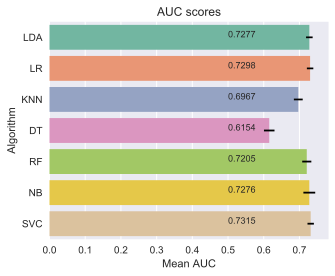

In [24]:
g = sns.barplot("AUC_Means","Algorithm",data = cv_res, orient = "h", **{'xerr':cv_std},  palette="Set2")
g.set_xlabel("Mean AUC")
g.set_title("AUC scores")

for index, row  in cv_res.iterrows():
    plt.text(x = 0.5 , y = index, s = round(row.AUC_Means,4), size = 9)
plt.show()

### I will take all algorithms to the next step

## Parameter Optimization

In [25]:
target_names = ['No Default', 'Default']

In [ ]:
fpr = []
tpr = []


### Linear Discriminant Analysis

In [19]:
LDA = LinearDiscriminantAnalysis()

LDA_params = {'solver': ['svd', 'lsqr', 'eigen']}

LDA_gs = GridSearchCV(LDA, param_grid = LDA_params, cv=kfold, scoring="roc_auc", n_jobs= -1, verbose = 1)

LDA_gs.fit(X_scaled, y_train)

LDA_final = LDA_gs.best_estimator_

Fitting 10 folds for each of 3 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    2.9s finished


In [20]:
 LDA_gs.best_estimator_

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001)

In [21]:
LDA_gs.best_score_

0.7277176997159002

### Logistic Regression

In [22]:
LR = LogisticRegression()

LR_params = {'penalty': ['l1', 'l2'],
             'C': [0.001, 0.01, 0.1, 1, 10]
             }

LR_gs = GridSearchCV(LR, param_grid = LR_params, cv=kfold, scoring="roc_auc", n_jobs= -1, verbose = 1)

LR_gs.fit(X_scaled, y_train)

LR_final = LR_gs.best_estimator_

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   10.3s finished


In [23]:
 LR_gs.best_estimator_

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [24]:
LR_gs.best_score_

0.7298636729034139

### K-Nearest Neighbors

In [26]:
KNN = KNeighborsClassifier()

KNN_params = {'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15],
              'weights': ['uniform', 'distance']}


KNN_gs = GridSearchCV(KNN, param_grid = KNN_params, cv=kfold, scoring="roc_auc", n_jobs= -1, verbose = 1)

KNN_gs.fit(X_scaled, y_train)

KNN_final = KNN_gs.best_estimator_

Fitting 10 folds for each of 16 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed: 11.1min finished


In [27]:
LDA_gs.best_estimator_

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001)

In [28]:
LDA_gs.best_score_

0.7277176997159002

### Decision Tree

In [29]:
DT = DecisionTreeClassifier()

DT_params = {'criterion' : ['entropy', 'gini'],
             'min_samples_split': [2, 3, 10],
             'min_samples_leaf': [1, 3, 10]}


DT_gs = GridSearchCV(DT, param_grid = DT_params, cv=kfold, scoring="roc_auc", n_jobs= -1, verbose = 1)

DT_gs.fit(X_scaled, y_train)

DT_final = DT_gs.best_estimator_

Fitting 10 folds for each of 18 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    8.6s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:   24.1s finished


In [30]:
DT_gs.best_estimator_

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=10, min_samples_split=10,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [31]:
DT_gs.best_score_

0.6954266339836401

### Random Forest

In [195]:
RF = RandomForestClassifier(oob_score = True)

RF_params = {'n_estimators': [100, 300, 500],
            'min_samples_leaf': [2, 4],
             'min_samples_split': [5, 10]}


RF_gs = GridSearchCV(RF, param_grid = RF_params, cv=kfold, scoring="roc_auc", n_jobs= -1, verbose = 1)

RF_gs.fit(X_scaled, y_train)

RF_final = RF_gs.best_estimator_

Fitting 10 folds for each of 12 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:  8.9min finished


In [196]:
RF_gs.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=4, min_samples_split=5,
            min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=1,
            oob_score=True, random_state=None, verbose=0, warm_start=False)

In [197]:
RF_gs.best_score_

0.77100653352648

In [224]:
RF_gs.cv_results_

D:\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
D:\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
D:\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
D:\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are acces

{'mean_fit_time': array([ 5.08724766, 17.91814895, 28.59850614,  5.37363966, 16.70777299,
        26.55630248,  5.0366529 , 15.15326736, 26.60297651,  5.49913282,
        16.58340983, 24.64347267]),
 'mean_score_time': array([0.0545187 , 0.19807069, 0.30116718, 0.04907215, 0.16643519,
        0.26113999, 0.04933546, 0.15788519, 0.26010542, 0.0528589 ,
        0.15855174, 0.27124245]),
 'mean_test_score': array([0.76417784, 0.76617507, 0.76652139, 0.76472877, 0.76698895,
        0.76825178, 0.76852269, 0.77100653, 0.77004789, 0.76858589,
        0.76911589, 0.77042548]),
 'mean_train_score': array([0.99731407, 0.99778193, 0.99788784, 0.9844994 , 0.98530153,
        0.98549484, 0.97638787, 0.97729627, 0.97741582, 0.97109558,
        0.97205543, 0.9722488 ]),
 'param_min_samples_leaf': masked_array(data=[2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 4],
              mask=[False, False, False, False, False, False, False, False,
                    False, False, False, False],
        fill_value='?',
 

### Naive Bayes

In [35]:
NB = GaussianNB()

NB_params = {}

NB_gs = GridSearchCV(NB, param_grid = NB_params, cv=kfold, scoring="roc_auc", n_jobs= -1, verbose = 1)

NB_gs.fit(X_scaled, y_train)

NB_final = NB_gs.best_estimator_

Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    2.1s finished


In [36]:
NB_gs.best_estimator_

GaussianNB(priors=None)

In [37]:
NB_gs.best_score_

0.7275842369892253

### Support Vector Machine

In [49]:
from sklearn.svm import SVC

In [51]:
SVM = SVC(probability=True)

SVM_params = {'C': [0.01, 0.1, 1]}

SVM_gs = GridSearchCV(SVM, param_grid = SVM_params, cv=kfold, scoring="roc_auc", n_jobs= -1, verbose = 1)

SVM_gs.fit(X_scaled, y_train)

SVM_final = SVM_gs.best_estimator_

Fitting 10 folds for each of 3 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 13.7min finished


AttributeError: 'GridSearchCV' object has no attribute 'best_estimator_'

In [57]:
SVM_final = SVM_gs.best_estimator_

In [55]:
SVM_gs.best_estimator_

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [56]:
SVM_gs.best_score_

0.7314683129701635

In [54]:
SVC_gs

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
       error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='Linear',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'C': [0.01, 0.1, 1]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring='roc_auc', verbose=1)

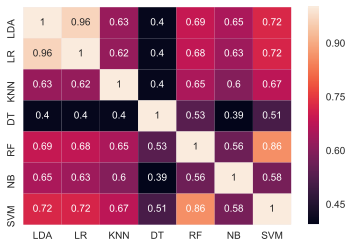

In [233]:
LDA_test_series = pd.Series(LDA_final.predict(X_scaled_test), name="LDA")
LR_test_series = pd.Series(LR_final.predict(X_scaled_test), name="LR")
KNN_test_series = pd.Series(KNN_final.predict(X_scaled_test), name="KNN")
DT_test_series = pd.Series(DT_final.predict(X_scaled_test), name="DT")
RF_test_series = pd.Series(RF_final.predict(X_scaled_test), name="RF")
NB_test_series = pd.Series(NB_final.predict(X_scaled_test), name="NB")
SVM_test_series = pd.Series(SVM_final.predict(X_scaled_test), name="SVM")

ensemble_results = pd.concat([LDA_test_series,LR_test_series,KNN_test_series,DT_test_series, 
                              RF_test_series,NB_test_series,SVM_test_series],axis=1)

g= sns.heatmap(ensemble_results.corr(),annot=True)

### Voting Classifier

In [236]:
voting_soft = VotingClassifier(estimators=[('LDA', LDA_final), ('LR', LR_final), ('KNN', KNN_final), ('DT', DT_final)
                                          , ('RF', RF_final), ('NB', NB_final), ('SVC', SVM_final)], voting='soft')




In [237]:
voting_soft_result = cross_val_score(voting_soft, X_scaled, y = y_train, scoring = 'roc_auc', cv = kfold, n_jobs=-1)

In [238]:
voting_soft_result.mean()

0.7632861473768559

In [64]:
#voting_soft_result.mean()

0.7632931827713809

In [239]:
voting_soft.fit(X_scaled, y_train)

VotingClassifier(estimators=[('LDA', LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001)), ('LR', LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_clas...',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False))],
         flatten_transform=None, n_jobs=1, voting='soft', weights=None)

In [234]:
voting_soft_wo_dt = VotingClassifier(estimators=[('LDA', LDA_final), ('LR', LR_final), ('KNN', KNN_final)
                                          , ('RF', RF_final), ('NB', NB_final), ('SVC', SVM_final)], voting='soft')


voting_soft_result_wo_dt = cross_val_score(voting_soft, X_scaled, y = y_train, scoring = 'roc_auc', cv = kfold, n_jobs=-1)

In [235]:
voting_soft_result_wo_dt.mean()

0.7634100870176839

In [240]:
voting_soft_wo_dt.fit(X_scaled, y_train)

VotingClassifier(estimators=[('LDA', LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001)), ('LR', LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_clas...',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False))],
         flatten_transform=None, n_jobs=1, voting='soft', weights=None)

### Model evaluation

In [241]:
y_LDA_predict_train = LDA_final.predict(X_scaled)
y_LDA_predict_test = LDA_final.predict(X_scaled_test)

y_LR_predict_train = LR_final.predict(X_scaled)
y_LR_predict_test = LR_final.predict(X_scaled_test)

y_KNN_predict_train = KNN_final.predict(X_scaled)
y_KNN_predict_test = KNN_final.predict(X_scaled_test)

y_DT_predict_train = DT_final.predict(X_scaled)
y_DT_predict_test = DT_final.predict(X_scaled_test)

y_RF_predict_train = RF_final.predict(X_scaled)
y_RF_predict_test = RF_final.predict(X_scaled_test)

y_NB_predict_train = NB_final.predict(X_scaled)
y_NB_predict_test = NB_final.predict(X_scaled_test)

y_SVM_predict_train = SVM_final.predict(X_scaled)
y_SVM_predict_test = SVM_final.predict(X_scaled_test)

y_VC_predict_train = voting_soft.predict(X_scaled)
y_VC_predict_test = voting_soft.predict(X_scaled_test)

y_VC_wo_dt_predict_train = voting_soft_wo_dt.predict(X_scaled)
y_VC_wo_dt_predict_test = voting_soft_wo_dt.predict(X_scaled_test)

D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `arra

In [242]:
#prob version for AUC
y_LDA_predict_train_prob = LDA_final.predict_proba(X_scaled)[:,1]
y_LDA_predict_test_prob = LDA_final.predict_proba(X_scaled_test)[:,1]

y_LR_predict_train_prob = LR_final.predict_proba(X_scaled)[:,1]
y_LR_predict_test_prob = LR_final.predict_proba(X_scaled_test)[:,1]

y_KNN_predict_train_prob = KNN_final.predict_proba(X_scaled)[:,1]
y_KNN_predict_test_prob = KNN_final.predict_proba(X_scaled_test)[:,1]

y_DT_predict_train_prob = DT_final.predict_proba(X_scaled)[:,1]
y_DT_predict_test_prob = DT_final.predict_proba(X_scaled_test)[:,1]

y_RF_predict_train_prob = RF_final.predict_proba(X_scaled)[:,1]
y_RF_predict_test_prob = RF_final.predict_proba(X_scaled_test)[:,1]

y_NB_predict_train_prob = NB_final.predict_proba(X_scaled)[:,1]
y_NB_predict_test_prob = NB_final.predict_proba(X_scaled_test)[:,1]

y_SVM_predict_train_prob = SVM_final.predict_proba(X_scaled)[:,1]
y_SVM_predict_test_prob = SVM_final.predict_proba(X_scaled_test)[:,1]

y_VC_predict_train_prob = voting_soft.predict_proba(X_scaled)[:,1]
y_VC_predict_test_prob = voting_soft.predict_proba(X_scaled_test)[:,1]

y_VC_wo_dt_predict_train_prob = voting_soft_wo_dt.predict_proba(X_scaled)[:,1]
y_VC_wo_dt_predict_test_prob = voting_soft_wo_dt.predict_proba(X_scaled_test)[:,1]


In [243]:
algorithm_list = ['LDA', 'LR', 'KNN', 'DT', 'RF', 'NB', 'SVM', 'VC', 'VC_wo_DT']

In [244]:
predict_train = [y_LDA_predict_train, y_LR_predict_train, y_KNN_predict_train, y_DT_predict_train, y_RF_predict_train,
                y_NB_predict_train, y_SVM_predict_train, y_VC_predict_train, y_VC_wo_dt_predict_train]
train_accuracy_scores = []
train_type1_scores = []
train_type2_scores = []
train_precision_scores = []
train_recall_scores = []

for train in predict_train:
    train_accuracy_scores.append(accuracy_score(y_train, train))
    
    tn, fp, fn, tp = confusion_matrix(y_train, train).ravel()
    train_type1_scores.append(fp)
    train_type2_scores.append(fn)
    train_precision_scores.append(precision_score(y_train, train, average='binary'))
    train_recall_scores.append(recall_score(y_train, train, average='binary'))


In [217]:
fpr, tpr, thresholds = metrics.roc_curve(y_train, y_RF_predict_train_prob)
metrics.auc(fpr, tpr)

0.9769867487100587

In [219]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_RF_predict_test_prob)
metrics.auc(fpr, tpr)

0.7767131101598654

In [245]:
predict_train_prob = [y_LDA_predict_train_prob, y_LR_predict_train_prob, y_KNN_predict_train_prob, 
                      y_DT_predict_train_prob, y_RF_predict_train_prob,y_NB_predict_train_prob, 
                      y_SVM_predict_train_prob, y_VC_predict_train_prob, y_VC_wo_dt_predict_train_prob]
train_auc_scores = []
for train in predict_train_prob:
    fpr, tpr, thresholds = metrics.roc_curve(y_train, train)
    train_auc_scores.append(metrics.auc(fpr, tpr))
    #train_auc_scores.append(roc_auc_score(y_train, train))

In [246]:
predict_test = [y_LDA_predict_test, y_LR_predict_test, y_KNN_predict_test, y_DT_predict_test, y_RF_predict_test,
                y_NB_predict_test, y_SVM_predict_test, y_VC_predict_test, y_VC_wo_dt_predict_test]
test_accuracy_scores = []
test_type1_scores = []
test_type2_scores = []
test_precision_scores = []
test_recall_scores = []


for test in predict_test:
    test_accuracy_scores.append(accuracy_score(y_test, test))
    
    tn, fp, fn, tp = confusion_matrix(y_test, test).ravel()
    test_type1_scores.append(fp)
    test_type2_scores.append(fn)
    test_precision_scores.append(precision_score(y_test, test, average='binary'))
    test_recall_scores.append(recall_score(y_test, test, average='binary'))
    


In [247]:
predict_test_prob = [y_LDA_predict_test_prob, y_LR_predict_test_prob, y_KNN_predict_test_prob, 
                      y_DT_predict_test_prob, y_RF_predict_test_prob,y_NB_predict_test_prob, 
                      y_SVM_predict_test_prob, y_VC_predict_test_prob, y_VC_wo_dt_predict_test_prob]
test_auc_scores = []
for test in predict_test_prob:
    test_auc_scores.append(roc_auc_score(y_test, test))

In [248]:
model_result_train = pd.DataFrame({"Algorithm":algorithm_list, "Accuracy Score": train_accuracy_scores,
                             "Type I error":train_type1_scores, "Type II error":train_type2_scores,
                             "Precision":train_precision_scores, "Recall":train_recall_scores,
                             "AUC":train_auc_scores})
model_result_train = model_result_train[['Algorithm', 'Accuracy Score', 'Type I error', 'Type II error', 'Precision', 'Recall', 'AUC']]

In [249]:
model_result_train

,Algorithm,Accuracy Score,Type I error,Type II error,Precision,Recall,AUC
0,LDA,0.782058,585,2855,0.673913,0.297490,0.730214
1,LR,0.780474,541,2924,0.678168,0.280512,0.732650
2,KNN,0.796566,611,2600,0.705542,0.360236,0.815450
3,DT,0.847694,734,1670,0.765345,0.589075,0.916558
4,RF,0.883426,148,1692,0.941270,0.583661,0.976987
5,NB,0.768373,1471,2185,0.560896,0.462352,0.728812
6,SVM,0.805436,569,2502,0.732989,0.384350,0.815568
7,VC,0.819247,554,2299,0.761104,0.434301,0.893105
8,VC_wo_DT,0.804549,646,2439,0.715544,0.399852,0.861462


In [220]:
model_result_test = pd.DataFrame({"Algorithm":algorithm_list, "Accuracy Score": test_accuracy_scores,
                             "Type I error":test_type1_scores, "Type II error":test_type2_scores,
                             "Precision":test_precision_scores, "Recall":test_recall_scores,
                             "AUC":test_auc_scores})
model_result_test = model_result_test[['Algorithm', 'Accuracy Score', 'Type I error', 'Type II error', 'Precision', 'Recall', 'AUC']]

In [221]:
model_result_test

,Algorithm,Accuracy Score,Type I error,Type II error,Precision,Recall,AUC
0,LDA,0.775976,134,750,0.684706,0.279539,0.728011
1,LR,0.773948,125,767,0.686717,0.263208,0.729774
2,KNN,0.776229,169,714,0.659274,0.314121,0.733499
3,DT,0.733654,396,655,0.493606,0.370797,0.686206
4,RF,0.785099,182,666,0.673250,0.360231,0.776713
5,NB,0.769894,343,565,0.581197,0.457253,0.731206
6,SVM,0.783325,160,695,0.683794,0.332373,0.737326
7,VC,0.785099,178,670,0.675774,0.356388,0.768136


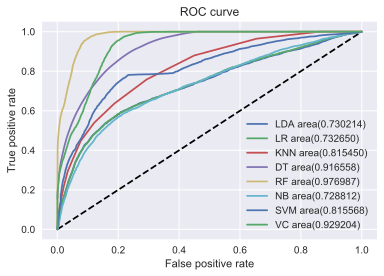

In [222]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
for index, val  in enumerate(predict_train_prob):
    fpr, tpr, thresholds = metrics.roc_curve(y_train, val)
    plt.plot(fpr, tpr, label='{0} area({1:0.6f})'
             ''.format(algorithm_list[index], metrics.auc(fpr, tpr)))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

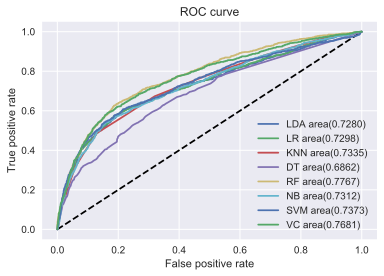

In [223]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
for index, val  in enumerate(predict_test_prob):
    fpr, tpr, thresholds = metrics.roc_curve(y_test, val)
    plt.plot(fpr, tpr, label='{0} area({1:0.4f})'
             ''.format(algorithm_list[index], metrics.auc(fpr, tpr)))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

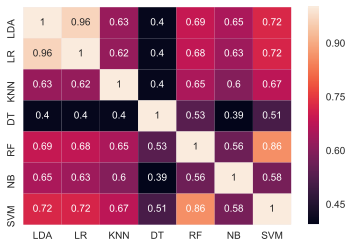

In [226]:
test_Survived_LDA = pd.Series(LDA_final.predict(X_scaled_test), name="LDA")
test_Survived_LR = pd.Series(LR_final.predict(X_scaled_test), name="LR")
test_Survived_KNN = pd.Series(KNN_final.predict(X_scaled_test), name="KNN")
test_Survived_DT = pd.Series(DT_final.predict(X_scaled_test), name="DT")
test_Survived_RF = pd.Series(RF_final.predict(X_scaled_test), name="RF")
test_Survived_NB = pd.Series(NB_final.predict(X_scaled_test), name="NB")
test_Survived_SVM = pd.Series(SVM_final.predict(X_scaled_test), name="SVM")



# Concatenate all classifier results
ensemble_results = pd.concat([test_Survived_LDA,test_Survived_LR,test_Survived_KNN,test_Survived_DT, test_Survived_RF,test_Survived_NB,test_Survived_SVM],axis=1)


g= sns.heatmap(ensemble_results.corr(),annot=True)

In [227]:
voting_soft_wo_dt = VotingClassifier(estimators=[('LDA', LDA_final), ('LR', LR_final), ('KNN', KNN_final)
                                          , ('RF', RF_final), ('NB', NB_final), ('SVC', SVM_final)], voting='soft')

voting_soft_wo_dt.fit(X_scaled, y_train)
#voting_soft_result_wo_dt = cross_val_score(voting_soft, X_scaled, y = y_train, scoring = 'roc_auc', cv = kfold, n_jobs=-1)

VotingClassifier(estimators=[('LDA', LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001)), ('LR', LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_clas...',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False))],
         flatten_transform=None, n_jobs=1, voting='soft', weights=None)

In [228]:
y_VC_predict_train_wo_dt = voting_soft_wo_dt.predict(X_scaled)
y_VC_predict_test_wo_dt = voting_soft_wo_dt.predict(X_scaled_test)

D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [229]:
accuracy_score(y_train, y_VC_predict_train_wo_dt)



0.8045489102889002

In [ ]:
tn, fp, fn, tp = confusion_matrix(y_train, y_VC_predict_train_wo_dt).ravel()
fp
fn


In [230]:
precision_score(y_train, y_VC_predict_train_wo_dt, average='binary')
recall_score(y_train, y_VC_predict_train_wo_dt, average='binary')

0.4003444881889764

In [231]:
y_VC_predict_train_wo_dt_prob = voting_soft_wo_dt.predict_proba(X_scaled)[:,1]
y_VC_predict_test_wo_dt_prob = voting_soft_wo_dt.predict_proba(X_scaled_test)[:,1]

In [232]:
roc_auc_score(y_test, y_VC_predict_test_wo_dt_prob)

0.7667786006107592

In [90]:
tn, fp, fn, tp = confusion_matrix(y_train, y_LDA_predict_train).ravel()

In [89]:
from sklearn.metrics import confusion_matrix

In [76]:
print("LDA")
print("- Train Accuracy Score:", accuracy_score(y_train, y_LDA_predict_train))
print("- Test Accuracy Score:", accuracy_score(y_test, y_LDA_predict_test))
print("LR")
print("- Train Accuracy Score:", accuracy_score(y_train, y_LR_predict_train))
print("- Test Accuracy Score:", accuracy_score(y_test, y_LR_predict_test))
print("KNN")
print("- Train Accuracy Score:", accuracy_score(y_train, y_KNN_predict_train))
print("- Test Accuracy Score:", accuracy_score(y_test, y_KNN_predict_test))
print("DT")
print("- Train Accuracy Score:", accuracy_score(y_train, y_DT_predict_train))
print("- Test Accuracy Score:", accuracy_score(y_test, y_DT_predict_test))
print("RF")
print("- Train Accuracy Score:", accuracy_score(y_train, y_RF_predict_train))
print("- Test Accuracy Score:", accuracy_score(y_test, y_RF_predict_test))
print("NB")
print("- Train Accuracy Score:", accuracy_score(y_train, y_NB_predict_train))
print("- Test Accuracy Score:", accuracy_score(y_test, y_NB_predict_test))
print("SVM")
print("- Train Accuracy Score:", accuracy_score(y_train, y_SVM_predict_train))
print("- Test Accuracy Score:", accuracy_score(y_test, y_SVM_predict_test))
print("VC")
print("- Train Accuracy Score:", accuracy_score(y_train, y_VC_predict_train))
print("- Test Accuracy Score:", accuracy_score(y_test, y_VC_predict_test))

LDA
- Train Accuracy Score: 0.7820577800304105
- Test Accuracy Score: 0.7759756715661429
LR
- Train Accuracy Score: 0.7804738976178408
- Test Accuracy Score: 0.7739483020780538
KNN
- Train Accuracy Score: 0.7965661429295489
- Test Accuracy Score: 0.7762290927521541
DT
- Train Accuracy Score: 0.8476938672072986
- Test Accuracy Score: 0.7336543335022808
RF
- Train Accuracy Score: 0.9993664470349721
- Test Accuracy Score: 0.7835783071464775
NB
- Train Accuracy Score: 0.7683730359858084
- Test Accuracy Score: 0.7698935631018753
SVM
- Train Accuracy Score: 0.8054358844399392
- Test Accuracy Score: 0.7833248859604663
VC
- Train Accuracy Score: 0.8310947795235681
- Test Accuracy Score: 0.7850988342625443


### Type I and Type II error

In [ ]:
tn, fp, fn, tp = confusion_matrix([0, 1, 0, 1], [1, 1, 1, 0]).ravel()
cv_results.append(cross_val_score(classifier, X_scaled, y = y_train, scoring = 'roc_auc', cv = kfold, n_jobs=-1))

In [ ]:
cv_res = pd.DataFrame({"AUC_Means":cv_means,"AUC_errors": cv_std,"Algorithm":["LDA", "LR", "KNN", "DT", "RF", "NB", "SVC"]})

In [92]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [68]:
y_predict_train = voting_soft.predict(X_scaled)
y_predict_test = voting_soft.predict(X_scaled_test)

#print("Train Accuracy Score:", accuracy_score(y_train, y_predict_train))
#print("Test Accuracy Score:", accuracy_score(y_test, y_predict_test))

target_names = ['No Default', 'Default']
print(classification_report(y_train, y_predict_train, target_names=target_names))
print(classification_report(y_test, y_predict_test, target_names=target_names))

D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


             precision    recall  f1-score   support

 No Default       0.84      0.96      0.89     11720
    Default       0.80      0.46      0.58      4064

avg / total       0.83      0.83      0.81     15784

             precision    recall  f1-score   support

 No Default       0.80      0.94      0.87      2905
    Default       0.68      0.36      0.47      1041

avg / total       0.77      0.79      0.76      3946



D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [70]:
from sklearn.metrics import accuracy_score

In [72]:
accuracy_score(y_test, y_predict_test)

0.7850988342625443

In [73]:
accuracy_score(y_train, y_predict_train)

0.8310947795235681

In [ ]:
y_predict_train = eclf1.predict(X_scaled)
y_predict_test = eclf1.predict(X_scaled_test)

print("Train Accuracy Score:", accuracy_score(y_train, y_predict_train))
print("Test Accuracy Score:", accuracy_score(y_test, y_predict_test))

target_names = ['No Default', 'Default']
print(classification_report(y_test, y_predict_test, target_names=target_names))

In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_predict_test)

In [ ]:
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())

cv_res = pd.DataFrame({"AUC_Means":cv_means,"AUC_errors": cv_std,"Algorithm":["LDA", "LR", "KNN", "DT", "RF", "NB", "SVC"]})

In [29]:
LDA_y_predict_test = LDA_final.predict(X_scaled_test)

In [32]:
print(classification_report(y_test, y_predict_test, target_names=target_names))

             precision    recall  f1-score   support

 No Default       0.79      0.95      0.86      2905
    Default       0.68      0.28      0.40      1041

avg / total       0.76      0.78      0.74      3946



In [38]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_predict_test)
metrics.auc(fpr, tpr)

0.6167057691449206

0.10770400405473897

In [63]:
RFC = RandomForestClassifier()


## Search grid for optimal parameters
rf_param_grid = {"max_features": [3, 10, 15, 23],
              "n_estimators" :[100, 300, 500]}

#rf_param_grid = {"max_depth": [4,5]}
gsRFC = GridSearchCV(RFC,param_grid = rf_param_grid, cv=kfold, scoring="roc_auc", n_jobs= 4, verbose = 1)

gsRFC.fit(X_scaled,y_train)

RFC_best = gsRFC.best_estimator_

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:  6.5min
[Parallel(n_jobs=4)]: Done  60 out of  60 | elapsed: 12.7min finished


In [64]:
RFC_best

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=3, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [113]:
y_predict_test = RFC_best.predict(X_scaled_test)

In [127]:
y_predict_test = RFC_best.predict_proba(X_scaled_test)[:,1] 

In [128]:
target_names = ['No Default', 'Default']
print(classification_report(y_test, y_predict_test, target_names=target_names))

ValueError: Mix type of y not allowed, got types {'continuous', 'binary'}

In [115]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_predict_test)
metrics.auc(fpr, tpr)

0.6562144832934043

In [65]:
y_predict_test = RFC_best.predict(X_scaled_test)

In [111]:
target_names = ['No Default', 'Default']
print(classification_report(y_test, y_predict_test, target_names=target_names))

             precision    recall  f1-score   support

 No Default       0.79      0.95      0.86      2905
    Default       0.67      0.28      0.40      1041

avg / total       0.76      0.77      0.74      3946



In [112]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_predict_test)
metrics.auc(fpr, tpr)

0.6163894772172263

In [68]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_predict_test)

0.7833248859604663

In [69]:
y_predict_train = RFC_best.predict(X_scaled)

accuracy_score(y_train, y_predict_train)

0.9993664470349721

In [70]:
fpr, tpr, thresholds = metrics.roc_curve(y_train, y_predict_train)
metrics.auc(fpr, tpr)

0.9989304237994142

In [94]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_predict_test)

0.647557211141809

In [101]:
LR = LogisticRegression()


## Search grid for optimal parameters
lr_param_grid = {"penalty":['l1', 'l2'],
                 "C":[0.001,0.01,0.1,1,10,100]}

#rf_param_grid = {"max_depth": [4,5]}
gsLR = GridSearchCV(LR,param_grid = lr_param_grid, cv=kfold, scoring="f1", n_jobs= 4, verbose = 1)

gsLR.fit(X_scaled,y_train)

LR_best = gsLR.best_estimator_

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    6.6s
[Parallel(n_jobs=4)]: Done  60 out of  60 | elapsed:    8.8s finished


In [102]:
LR_best

LogisticRegression(C=0.001, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [103]:
y_predict_test = LR_best.predict(X_scaled_test)

In [104]:
target_names = ['No Default', 'Default']
print(classification_report(y_test, y_predict_test, target_names=target_names))

             precision    recall  f1-score   support

 No Default       0.79      0.95      0.86      2905
    Default       0.67      0.28      0.40      1041

avg / total       0.76      0.77      0.74      3946



In [123]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_predict_test)
metrics.auc(fpr, tpr)

0.7638306209605816

In [109]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_predict_test)

0.7736948808920425

In [110]:
fpr, tpr, thresholds = metrics.roc_curve(y_train, y_predict_train)
metrics.auc(fpr, tpr)

0.9989304237994142

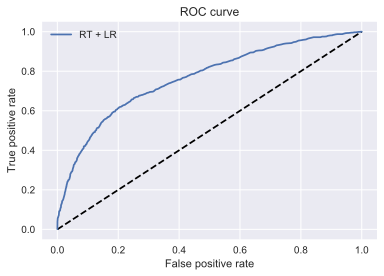

In [124]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='RT + LR')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [117]:
fpr

array([0.       , 0.0746988, 1.       ])

In [118]:
tpr

array([0.        , 0.38712776, 1.        ])

In [ ]:
LDA_y_predict_test_prob = LDA_final.predict_proba(X_scaled_test)[:,1] 
LDA_y_predict_test = LDA_final.predict(X_scaled_test)

In [119]:
thresholds

array([2, 1, 0], dtype=int64)

#### Ref. https://www.kaggle.com/yassineghouzam/titanic-top-4-with-ensemble-modeling